In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
df_br = pd.read_excel('./data/нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
df_br = df_br.sort_index()

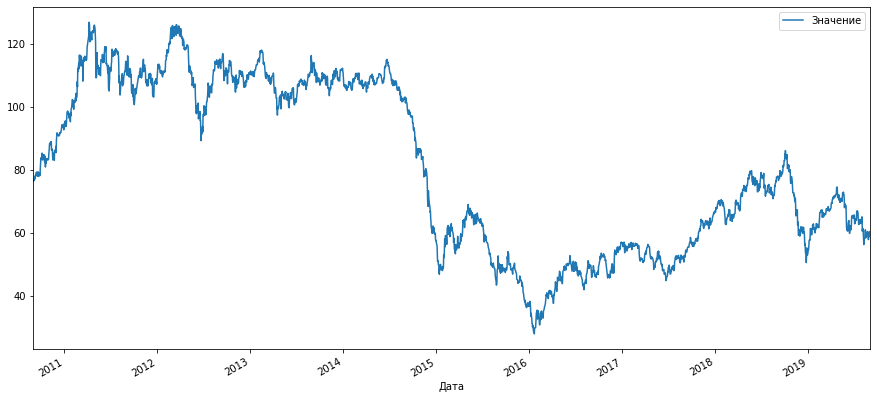

In [5]:
df_br.plot(figsize=(15,7));

In [20]:
df_y_mean = df_br.resample('Y').mean()
df_y_std = df_br.resample('Y').std()
df_m_mean = df_br.resample('M').mean()
df_m_std = df_br.resample('M').std()
df_w_mean = df_br.resample('W').mean()
df_w_std = df_br.resample('W').std()

In [53]:
def plot_with_std(df_mean, df_std, title):
    plt.figure(figsize=(15,7))
    plt.xlabel('')
    plt.title(title)
    v = 'Значение'
    
    ax1 = df_mean[v].plot(color='black', grid=True, label='Mean')
    ax2 = (df_mean[v] + df_std[v]).plot(color='green', grid=True, label='Mean + Std')
    ax3 = (df_mean[v] - df_std[v]).plot(color='red', grid=True, label='Mean - Std')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()


    plt.legend(l1+l2+l3, loc=1)
    plt.show()

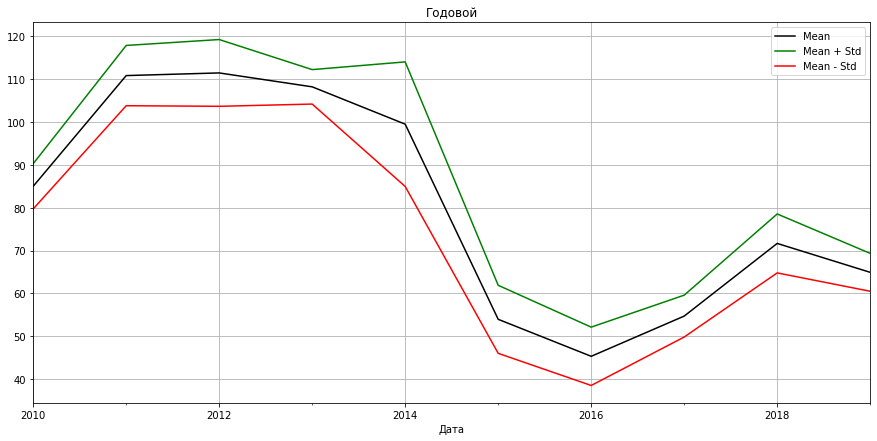

In [54]:
plot_with_std(df_y_mean, df_y_std, 'Годовой')

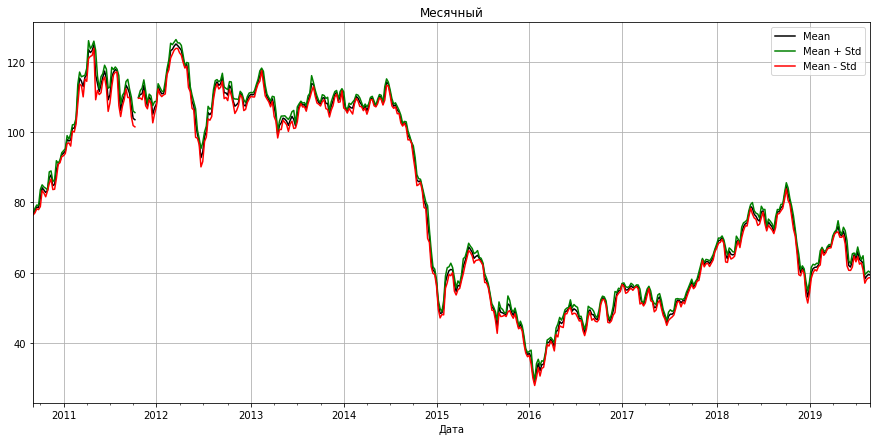

In [55]:
plot_with_std(df_w_mean, df_w_std, 'Месячный')

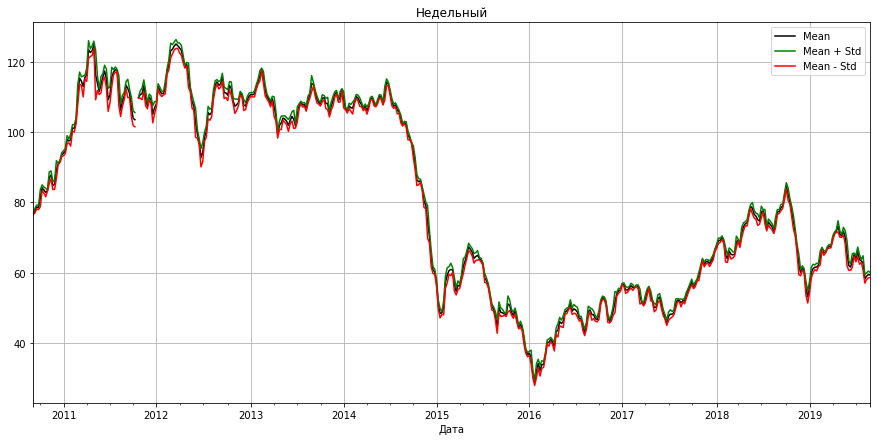

In [56]:
plot_with_std(df_w_mean, df_w_std, 'Недельный')